dataset link https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/

In [1]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mushyamukesh
Your Kaggle Key: ··········


100%|██████████| 534M/534M [00:26<00:00, 21.4MB/s]


In [2]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [3]:
# Step 1: Preprocess the Data
train_data_dir = '/content/vegetable-image-dataset/Vegetable Images/train'
test_data_dir = '/content/vegetable-image-dataset/Vegetable Images/test'
validation_data_dir = '/content/vegetable-image-dataset/Vegetable Images/validation'
batch_size = 32


In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size = 32,
                                                         image_size=(224, 224),
                                                         shuffle = True,
                                                         seed = 42

                                                         )

Found 15000 files belonging to 15 classes.


In [5]:
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size = 16,
                                                         image_size=(224, 224)
                                                         )

Found 3000 files belonging to 15 classes.


In [6]:
val_data = tf.keras.utils.image_dataset_from_directory(validation_data_dir,
                                                         batch_size = 16,
                                                         image_size=(224, 224)

                                                         )

Found 3000 files belonging to 15 classes.


In [7]:
vegtable_classes = len(os.listdir(train_data_dir))
vegtable_classes

15

In [8]:
def view_random_image(target_dir, target_class,verbose=0):

    if target_class==None:
        target_class=random.sample(os.listdir(train_data_dir), 1)[0]

    # setting up the image directory
    target_folder = target_dir + "/" + target_class

    #get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    #read image and plotting it
    img = mpimg.imread(target_folder + "/" + random_image[0] )
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    if verbose==1:
        print(f"Image shape: {img.shape}")

    return img

In [9]:
def view_6_random_image(target_dir, target_class=None,verbose=0):

    plt.figure(figsize = (12,12))

    for x in range(1,7):

        plt.subplot(3,3,x)
        img=view_random_image(target_dir = target_dir,
                        target_class = target_class,verbose=verbose)

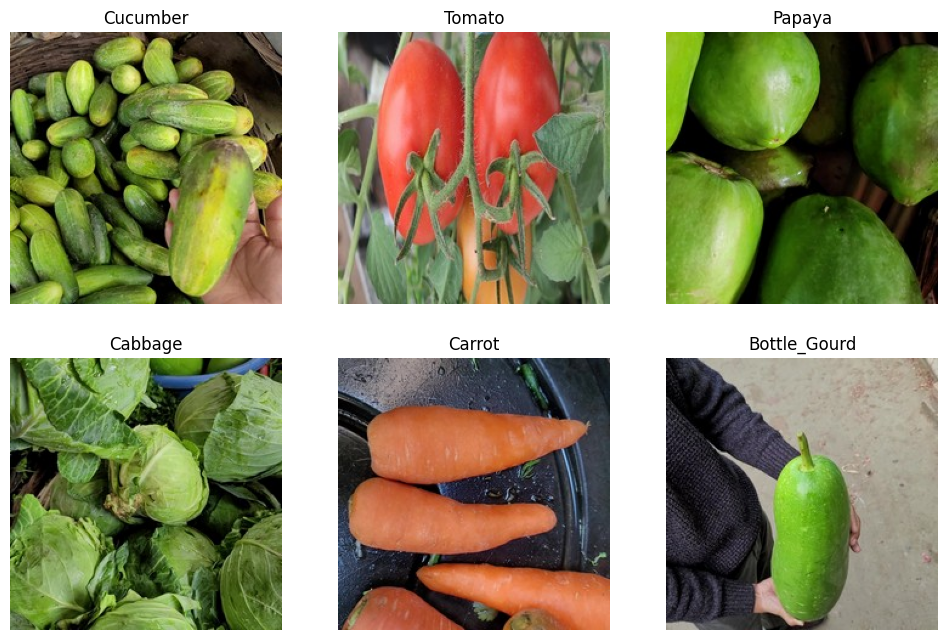

In [10]:
view_6_random_image(train_data_dir)

# Tensorflow Keras

In [11]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D, Rescaling

# Model Creation


In [12]:
# Model Creation
model = Sequential()
# model.add(Rescaling(1./255))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dense(vegtable_classes, activation='softmax'))
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

# Model Fit

In [13]:
import tensorflow as tf
callbacks = [
  tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=2,
    restore_best_weights=True
  )
]
# , tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='loss',save_best_only=True)

history = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=callbacks)

Epoch 1/20
469/469 [==============================] - 47s 65ms/step - loss: 2.0711 - accuracy: 0.3497 - val_loss: 1.3073 - val_accuracy: 0.5487
Epoch 2/20
469/469 [==============================] - 26s 55ms/step - loss: 1.1783 - accuracy: 0.6023 - val_loss: 0.7446 - val_accuracy: 0.7637
Epoch 3/20
469/469 [==============================] - 25s 54ms/step - loss: 0.8712 - accuracy: 0.7104 - val_loss: 0.5861 - val_accuracy: 0.8010
Epoch 4/20
469/469 [==============================] - 26s 56ms/step - loss: 0.7105 - accuracy: 0.7684 - val_loss: 0.5220 - val_accuracy: 0.8243
Epoch 5/20
469/469 [==============================] - 26s 54ms/step - loss: 0.5813 - accuracy: 0.8119 - val_loss: 0.3397 - val_accuracy: 0.8987
Epoch 6/20
469/469 [==============================] - 25s 54ms/step - loss: 0.4962 - accuracy: 0.8427 - val_loss: 0.3303 - val_accuracy: 0.8940
Epoch 7/20
469/469 [==============================] - 26s 54ms/step - loss: 0.4483 - accuracy: 0.8597 - val_loss: 0.3065 - val_accuracy:

In [14]:
# Evaluate the model after fine-tuning
test_loss, test_accuracy = model.evaluate(test_data, steps=len(test_data))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

188/188 [==============================] - 3s 14ms/step - loss: 0.0936 - accuracy: 0.9777
Test Loss: 0.09355764836072922
Test Accuracy: 0.9776666760444641


In [15]:
model.save('model.h5')

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


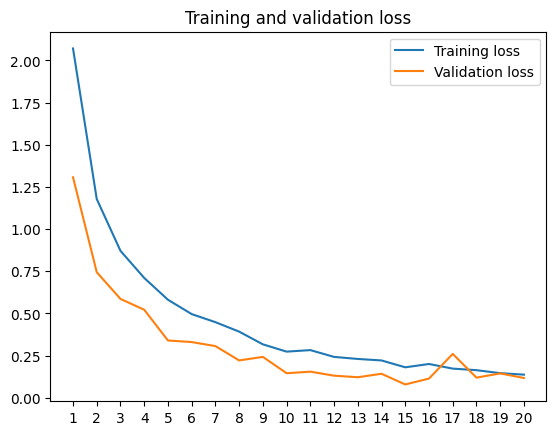

In [20]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the data
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xticks(range(len(train_loss)), labels=range(1, len(train_loss)+1))
plt.legend()
plt.savefig("train_val_loss.png")
plt.show()

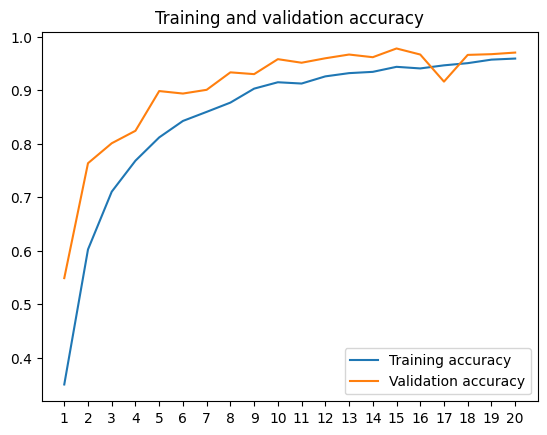

In [21]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the data
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xticks(range(len(train_accuracy)), labels=range(1, len(train_accuracy)+1))
plt.legend()
plt.savefig("train_val_accuracy.png")
plt.show()

In [22]:
# Get the true labels and predicted labels
true_labels = []
predicted_labels = []

In [23]:
for images, labels in test_data:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

1/1 [==============================] - 0s 25ms/step


In [24]:
# Create a classification report
class_names = sorted(os.listdir(train_data_dir))
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

              precision    recall  f1-score   support

        Bean       0.99      0.98      0.99       200
Bitter_Gourd       0.98      0.98      0.98       200
Bottle_Gourd       1.00      0.96      0.98       200
     Brinjal       0.95      0.99      0.97       200
    Broccoli       0.99      0.94      0.96       200
     Cabbage       0.97      0.97      0.97       200
    Capsicum       0.99      0.98      0.98       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.97      0.95      0.96       200
    Cucumber       0.99      0.97      0.98       200
      Papaya       0.95      0.98      0.97       200
      Potato       0.98      0.99      0.99       200
     Pumpkin       0.94      0.99      0.97       200
      Radish       0.99      0.98      0.99       200
      Tomato       0.98      0.97      0.98       200

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98   

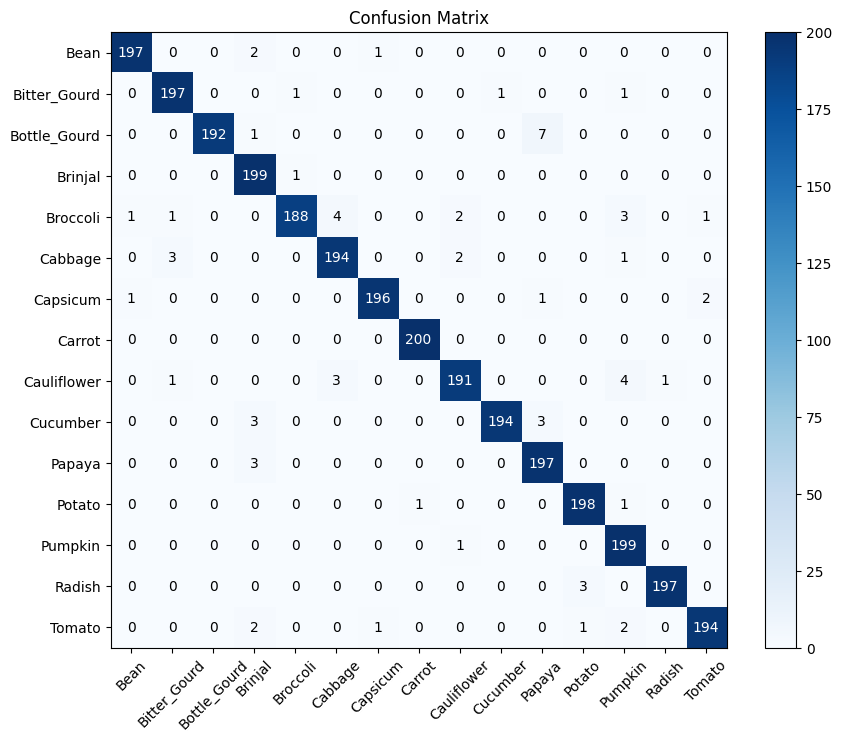

In [26]:
# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

# Show numbers in the confusion matrix
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > np.max(conf_matrix) / 2 else 'black')

plt.title('Confusion Matrix')
plt.xticks(np.arange(0, len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(0, len(class_names)), class_names)
plt.colorbar()
plt.savefig("confusion_matrix.png")
plt.show()

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [29]:
precision = precision_score(true_labels, predicted_labels, average ='micro')
recall    = recall_score(true_labels, predicted_labels, average ='micro')
f1        = f1_score(true_labels, predicted_labels, average ='micro')

print(f"Precision = {round(precision * 100, 2)}%")
print(f"Recall = {round(recall * 100, 2)}%")
print(f"F1-score = {round(f1 * 100, 2)}%")

Precision = 97.77%
Recall = 97.77%
F1-score = 97.77%
